In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np

# For visualisations
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

## Exploration

In [2]:
# Load data
train_data = pd.read_excel('Data_train.xlsx')

# First five rows
train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [3]:
# check columns
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [4]:
#Shape of the data
train_data.shape

(10683, 11)

In [5]:
# Statistical summary
train_data.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [6]:
# Check for missing values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Data Cleaning

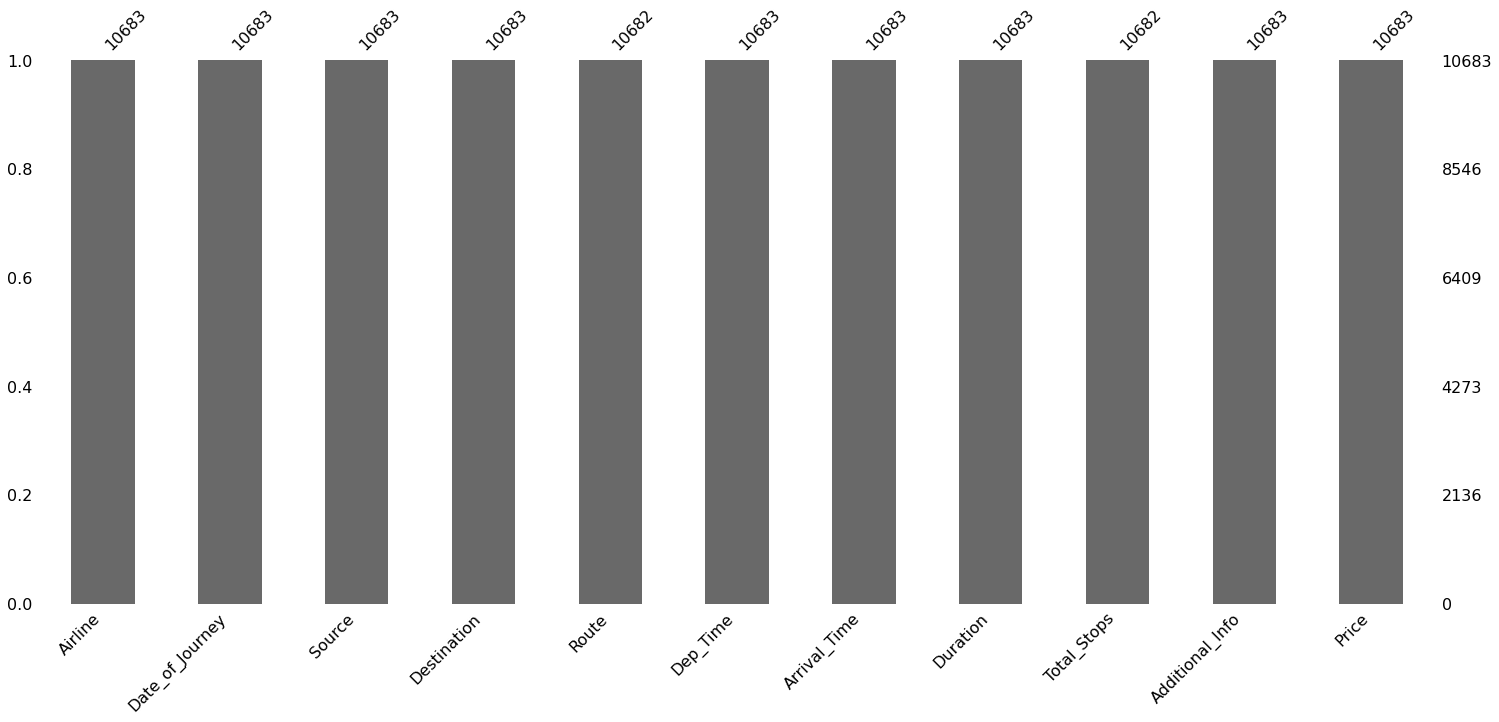

In [7]:
# Visualise missing values

msno.bar(train_data)

In [8]:
#Drop null values
train_data.dropna(inplace=True)

In [9]:
# Preview info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [10]:
# Change date into right format and separate month and day
# Extract month and day

train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'],infer_datetime_format=True).dt.month
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'],infer_datetime_format=True).dt.day

train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Journey_month  Journey_day  
0              3           24  
1              5            1  
2              6            9  
3              5           12  
4              3            1

In [11]:
# Extract year
train_data['Journey_year'] = pd.to_datetime(train_data['Date_of_Journey'],infer_datetime_format=True).dt.year
train_data['Journey_year'].unique()

array([2019], dtype=int64)

It turns out , we are only dealing with one year . Thus we can drop the date of journey column and remain with the day and month . We will also drop journey ,the operation above was to determine wether we have many years .

In [12]:
# Drop
train_data.drop(['Journey_year','Date_of_Journey'],inplace=True,axis=1)

In [13]:
# Change data type and extract hour and minutes in depature time

train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time'],infer_datetime_format=True).dt.hour
train_data['Dep_minutes'] = pd.to_datetime(train_data['Dep_Time'],infer_datetime_format=True).dt.minute

# Drop Dep_Time
train_data.drop(['Dep_Time'],axis=1,inplace=True)

In [14]:
# Change data type and extract hour and minutes in arrival time

train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time'],infer_datetime_format=True).dt.hour
train_data['Arrival_minutes'] = pd.to_datetime(train_data['Arrival_Time'],infer_datetime_format=True).dt.minute

# Drop Dep_Time
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [15]:
train_data.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Journey_month  Journey_day  Dep_hour  \
0    non-stop         No info   3897              3           24        22   
1     2 stops         No info   7662              5            1         5   
2     2 stops         No info  13882              6            9         9   
3      1 stop         No info   6218              5           12        18   
4      1 stop         No info  13302              3            1        16   

   Dep_minutes  Arrival_hour  Arrival_minutes  
0           20             1               10  
1           50            13               15  
2           25             4               25  
3            5            23               30  
4           50            21               35

In [16]:
# Separate hours and minutes in Duration column

duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour



In [17]:
# Append hours and min and add them into the dataframe
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Add to dataframe
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

# Drop Duration column

train_data.drop(["Duration"], axis=1,inplace=True)

In [18]:
# View
train_data[['Duration_mins','Duration_hours']].head()

Duration_mins  Duration_hours
0             50               2
1             25               7
2              0              19
3             25               5
4             45               4

## Handling Categorical Features

In [19]:
# Check for categorical features in the dataset

categorical_columns = [ col for col in train_data.columns if train_data[col].dtype == 'object']
categorical_columns

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [65]:
# Numerical columns
continuous_columns =[column for column in train_data.columns if train_data[column].dtype!='object']
continuous_columns

['Price',
 'Journey_month',
 'Journey_day',
 'Dep_hour',
 'Dep_minutes',
 'Arrival_hour',
 'Arrival_minutes',
 'Duration_hours',
 'Duration_mins']

In [20]:
# Categorical features
categorical = train_data[categorical_columns]
categorical.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  
0         No info  
1         No info  
2         No info  
3         No info  
4         No info

### One Hot Encoding

In [21]:
# Change categorical features to numbers
airline = pd.get_dummies(categorical['Airline'],drop_first=True)
airline.head()


Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       1            0                     0   
1          1      0       0            0                     0   
2          0      0       0            1                     0   
3          0      0       1            0                     0   
4          0      0       1            0                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                  0                                  0         0       0   
1                  0                                  0         0       0   
2                  0                                  0         0       0   
3                  0                                  0         0       0   
4                  0                                  0         0       0   

   Vistara  Vistara Premium economy  
0        0                        0  
1        0                        0  
2        0                        0  
3        0                        0  
4        0                        0

## Exploratory Data Anaysis

In [22]:
# Profile Report
from pandas_profiling import ProfileReport

profile = ProfileReport(train_data,explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

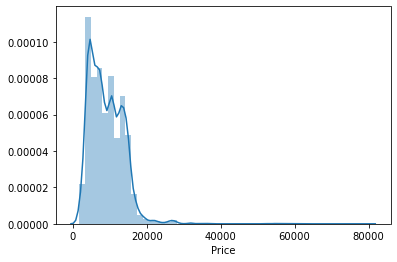

In [23]:
# Price prediction

sns.distplot(train_data['Price']);

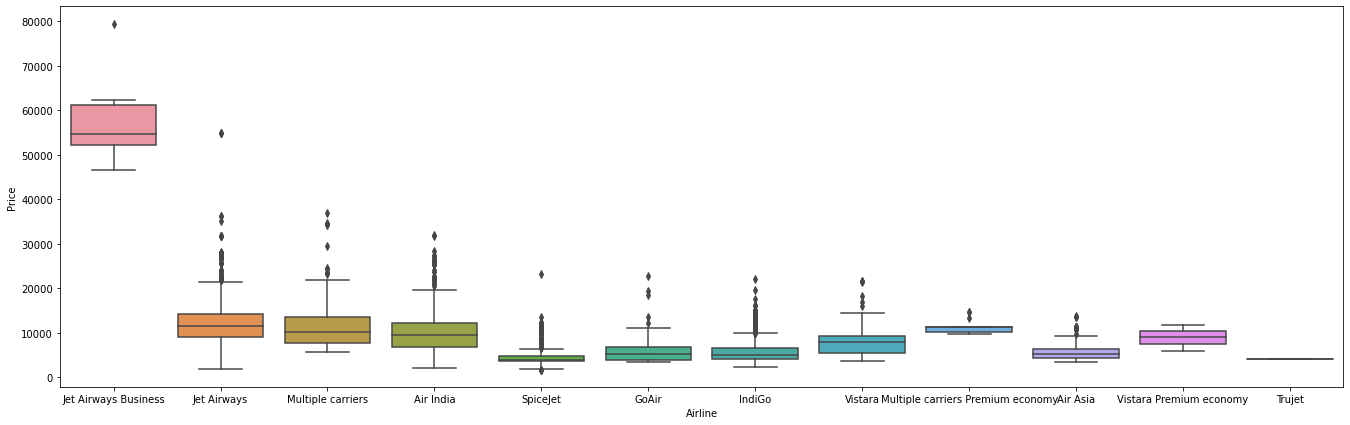

In [24]:
# Airplane vs price
plt.figure(figsize=(23,7))
sns.boxplot(x='Airline',y='Price',data = train_data.sort_values('Price',ascending=False))

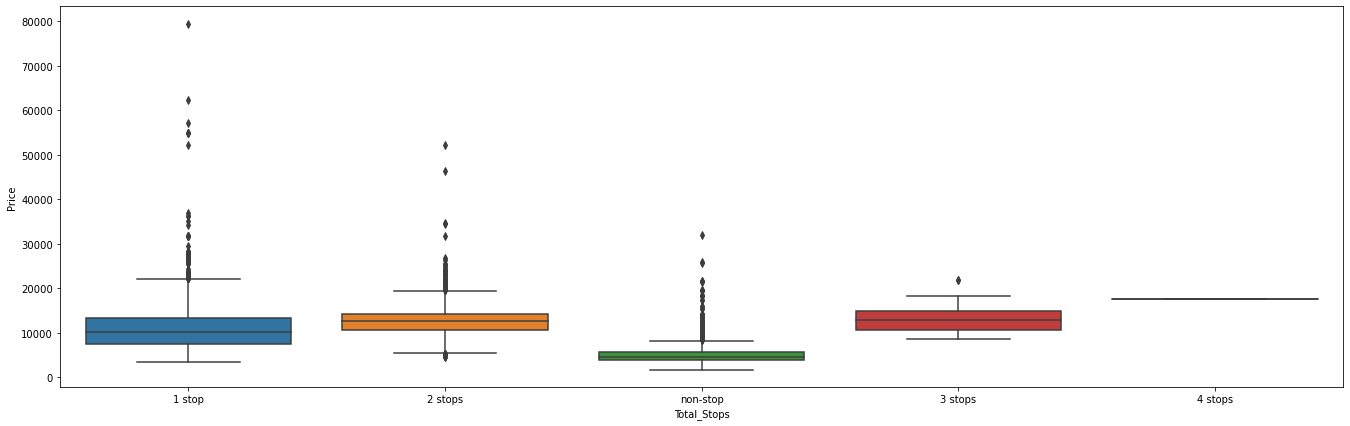

In [25]:
# Total stops vs Price
plt.figure(figsize=(23,7))
sns.boxplot(x='Total_Stops',y='Price',data = train_data.sort_values('Price',ascending=False))

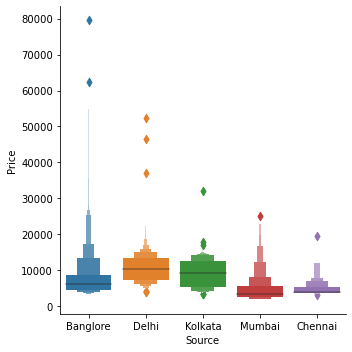

In [26]:
# Source vs Price
sns.catplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False),kind='boxen')

In [27]:
# Change categorical features to numbers
source = pd.get_dummies(categorical['Source'],drop_first=True)
source.head()


Chennai  Delhi  Kolkata  Mumbai
0        0      0        0       0
1        0      0        1       0
2        0      1        0       0
3        0      0        1       0
4        0      0        0       0

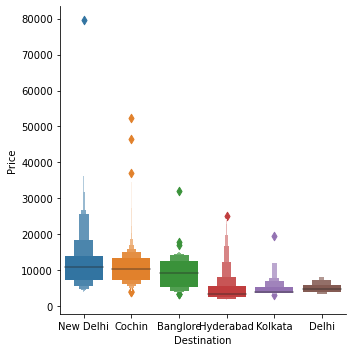

In [28]:
# Destination vs price
sns.catplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False),kind='boxen')

In [29]:
# Change categorical features to numbers
destination = pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()


Cochin  Delhi  Hyderabad  Kolkata  New Delhi
0       0      0          0        0          1
1       0      0          0        0          0
2       1      0          0        0          0
3       0      0          0        0          0
4       0      0          0        0          1

### More Preprocessing

In [31]:
# Route counts
categorical['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → RPR → HYD → BLR             1
BOM → NDC → HYD                   1
BOM → BLR → CCU → BBI → HYD       1
BOM → COK → MAA → HYD             1
BLR → HBX → BOM → BHO → DEL       1
Name: Route, Length: 128, dtype: int64

In [37]:
# Separate routes
categorical.loc[:,'Route1'] = categorical.loc[:,'Route'].str.split('→').str[0]
categorical['Route2'] = categorical['Route'].str.split('→').str[1]
categorical['Route3'] = categorical['Route'].str.split('→').str[2]
categorical['Route4'] = categorical['Route'].str.split('→').str[3]
categorical['Route5'] = categorical['Route'].str.split('→').str[4]

In [38]:
# View
categorical.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info Route1 Route2 Route3 Route4 Route5  
0         No info   BLR     DEL    NaN    NaN    NaN  
1         No info   CCU    IXR    BBI     BLR    NaN  
2         No info   DEL    LKO    BOM     COK    NaN  
3         No info   CCU    NAG     BLR    NaN    NaN  
4         No info   BLR    NAG     DEL    NaN    NaN

In [43]:
#Drop Route
categorical.drop('Route',inplace=True,axis=1)

In [40]:
# Drop additional information
categorical.drop('Additional_Info',inplace=True,axis=1)

In [44]:
# View
categorical.head()

Airline    Source Destination Total_Stops Route1 Route2 Route3 Route4  \
0       IndiGo  Banglore   New Delhi    non-stop   BLR     DEL    NaN    NaN   
1    Air India   Kolkata    Banglore     2 stops   CCU    IXR    BBI     BLR   
2  Jet Airways     Delhi      Cochin     2 stops   DEL    LKO    BOM     COK   
3       IndiGo   Kolkata    Banglore      1 stop   CCU    NAG     BLR    NaN   
4       IndiGo  Banglore   New Delhi      1 stop   BLR    NAG     DEL    NaN   

  Route5  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN

In [45]:
# Check missing values
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Route1             0
Route2             0
Route3          3491
Route4          9116
Route5         10636
dtype: int64

In [48]:
# Fill missing categorical values with None 

with_missing = ['Route3','Route4','Route5']
for feature in with_missing:
    categorical[feature].fillna('None',inplace=True)

In [49]:
# Check missing values
categorical.isnull().sum()

Airline        0
Source         0
Destination    0
Total_Stops    0
Route1         0
Route2         0
Route3         0
Route4         0
Route5         0
dtype: int64

In [55]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [56]:
categorical.head()

Airline    Source Destination Total_Stops  Route1  Route2  Route3  \
0       IndiGo  Banglore   New Delhi    non-stop       0      13      29   
1    Air India   Kolkata    Banglore     2 stops       2      25       1   
2  Jet Airways     Delhi      Cochin     2 stops       3      32       4   
3       IndiGo   Kolkata    Banglore      1 stop       2      34       3   
4       IndiGo  Banglore   New Delhi      1 stop       0      34       8   

   Route4  Route5  
0      13       5  
1       3       5  
2       5       5  
3      13       5  
4      13       5

In [57]:
# Check unique stops
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [59]:
# Encode total_stops
categorical['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [60]:
categorical.head()

Airline    Source Destination  Total_Stops  Route1  Route2  Route3  \
0       IndiGo  Banglore   New Delhi            0       0      13      29   
1    Air India   Kolkata    Banglore            2       2      25       1   
2  Jet Airways     Delhi      Cochin            2       3      32       4   
3       IndiGo   Kolkata    Banglore            1       2      34       3   
4       IndiGo  Banglore   New Delhi            1       0      34       8   

   Route4  Route5  
0      13       5  
1       3       5  
2       5       5  
3      13       5  
4      13       5

In [62]:
# Drop features
categorical.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [66]:
# Merge features
final_df = pd.concat([categorical,airline,source,destination,train_data[continuous_columns]],axis=1)
final_df.head()

Total_Stops  Route1  Route2  Route3  Route4  Route5  Air India  GoAir  \
0            0       0      13      29      13       5          0      0   
1            2       2      25       1       3       5          1      0   
2            2       3      32       4       5       5          0      0   
3            1       2      34       3      13       5          0      0   
4            1       0      34       8      13       5          0      0   

   IndiGo  Jet Airways  ...  New Delhi  Price  Journey_month  Journey_day  \
0       1            0  ...          1   3897              3           24   
1       0            0  ...          0   7662              5            1   
2       0            1  ...          0  13882              6            9   
3       1            0  ...          0   6218              5           12   
4       1            0  ...          1  13302              3            1   

   Dep_hour  Dep_minutes  Arrival_hour  Arrival_minutes  Duration_hours  \
0        22           20             1               10               2   
1         5           50            13               15               7   
2         9           25             4               25              19   
3        18            5            23               30               5   
4        16           50            21               35               4   

   Duration_mins  
0             50  
1             25  
2              0  
3             25  
4             45  

[5 rows x 35 columns]

In [68]:
# Check size 
final_df.shape

(10682, 35)

## Modelling